### Import the important Libraries

In [1]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

### Problem Statement:

### Loading the Dataset

In [3]:
data_set=pd.read_csv(r"C:\Users\ace27\OneDrive\Desktop\Emkay's Stuff\Python Stuff\diabetes.csv")

### More insights about the Dataset

In [4]:
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data_set.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
print(f'Total number of rows is: {data_set.shape[0]}')
print(f'Total number of columns is: {data_set.shape[1]}')

Total number of rows is: 768
Total number of columns is: 9


In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Correlation matrix

In [9]:
data_set.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


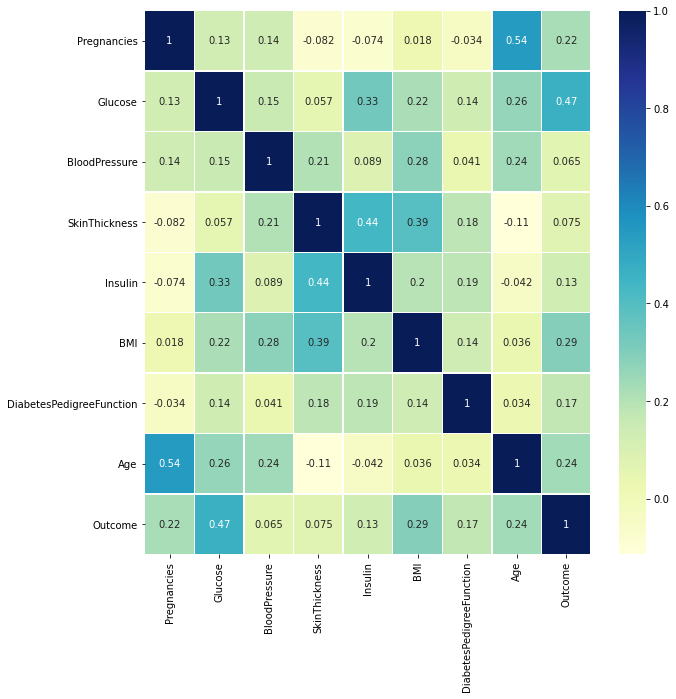

In [10]:
corr_matrix=data_set.corr()
corr_features=corr_matrix.index
plt.figure(figsize=(10, 10))
g = sns.heatmap(data_set[corr_features].corr(), annot=True, cmap='YlGnBu', linewidths=.5)
plt.show()

### Approach

### What are Decision Trees?

### Describing the Features and target variables

#### X is the Features variable:

In [11]:
X=data_set[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values

#### Y is the Target variable:

In [12]:
Y=data_set['Outcome']

### Spliting the data

In [13]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=1)

In [14]:
print(f'Dimensions for the Training data:\nx_train: {x_train.shape}, y_train: {y_train.shape}')

Dimensions for the Training data:
x_train: (537, 8), y_train: (537,)


In [15]:
print(f'Dimensions for the Testing data:\nx_test: {x_test.shape}, y_test: {y_test.shape}')

Dimensions for the Testing data:
x_test: (231, 8), y_test: (231,)


### Setting up the Decision Tree

In [16]:
OutcomeTree=DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(x_train, y_train)
OutcomeTree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Prediction

In [17]:
predOutcome=OutcomeTree.predict(x_test)

##### We print the predOutcome and the y_test to visually compare the prediction to the actual values:

In [18]:
print(f'predOutcome values: {predOutcome[:5]}\n')
print(f'y_test values: \n{y_test[:5]}')

predOutcome values: [0 0 0 0 0]

y_test values: 
285    0
101    0
581    0
352    0
726    0
Name: Outcome, dtype: int64


### Evaluation

In [19]:
print(f"Decison Tree's accuracy score: {metrics.accuracy_score(y_test, predOutcome)*100}%")

Decison Tree's accuracy score: 77.05627705627705%


### Visualization

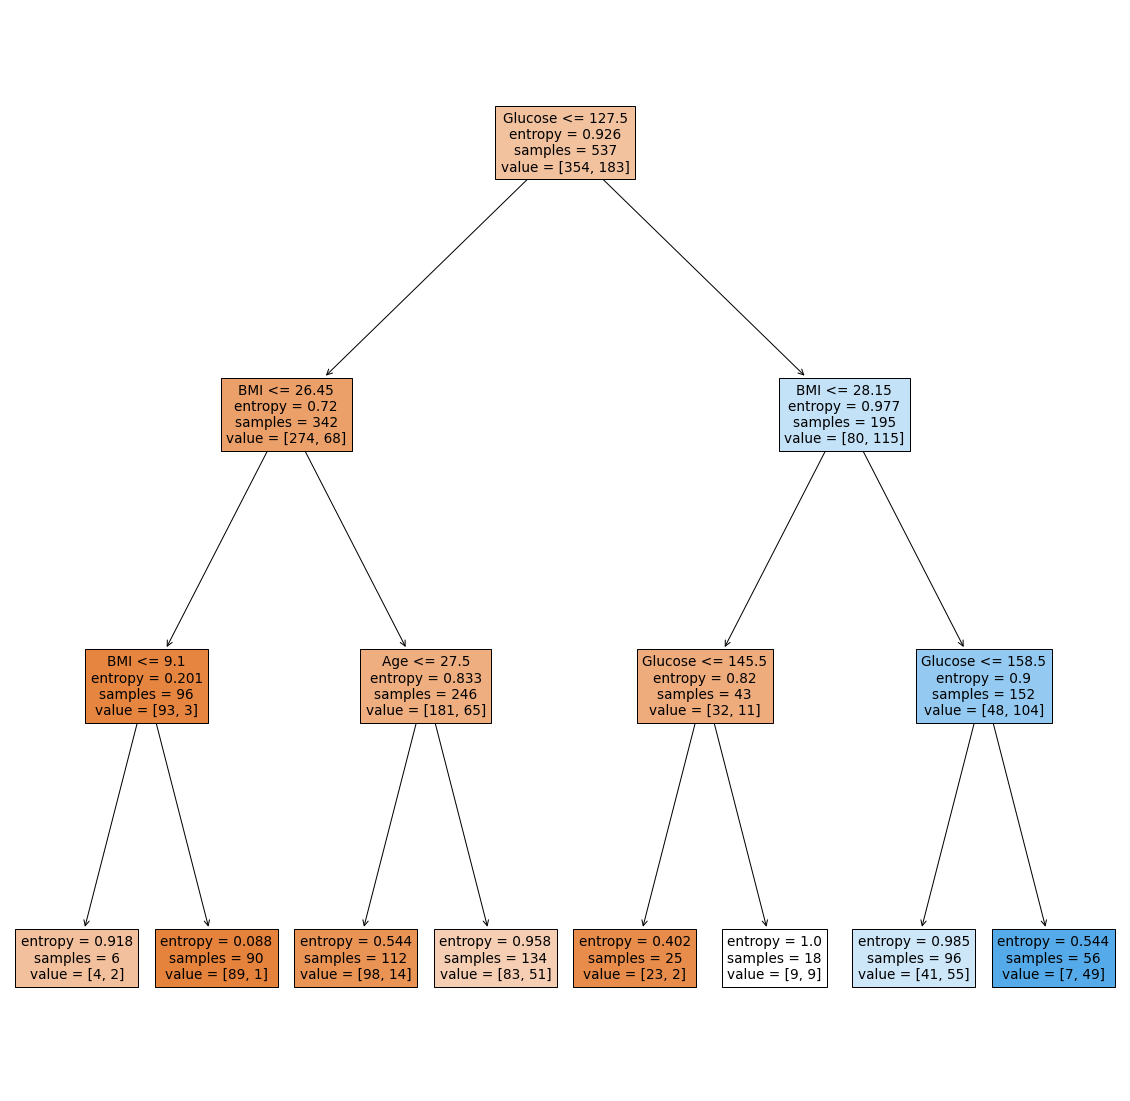

In [20]:
featureNames = data_set.columns[0:8]
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(OutcomeTree,ax=ax,feature_names=featureNames, filled=True)
plt.show()